

## Part 1

1. Why is output of $\sigma$ in the interval (0, 1)?
- The sigmoid function is an activation function, where 

$$
    \sigma(z) = \frac{1}{1+e^{-z}}
.$$ 
The denominator will always be greater than 1 and greater than the numerator; therefore, the output of $\sigma$ lies between the interval (0, 1). Furthermore, the sigmoid outputs can also be intepret as probabilities since probability is always between 0 and 1.

2. Why the output of $\sigma$ cannot equal 0 or 1?

- We can only get an output of 0 if the numerator is equal to 0. However, the numerator equals 1, so the output of $\sigma$ will never equal to 0. The denominator is the sum of a whole number and an irrational number; therefore, the denominator will always be an irrational number greater than 1. Beacause the denominator is greater than the numerator, $\sigma$ cannot equal 1. 




3. For what value of $z$ is $\sigma$(z) = 0.5?
- When $z$ = 0, $\sigma$(z) will equal 0.5

In [875]:
import numpy as np

def sigmoid(z):
    return (1/(1+np.e**(-z)))

In [876]:
sigmoid(0)

0.5

4. Show that $\sigma$'($z$) = $\sigma$($z$) · (1 − $\sigma$($z$)).

- To prove the above statement, we take the derivative of sigmoid using the quoatient rule. 



 
 
$$ \frac{d}{dz} \sigma(z)  = 
    \frac{d}{dz}[\frac{1}{1+e^{-z}}]
$$ 


$$  = 
    \frac{(0)(1+e^{-z}) - (-e^{-z})(1)} {(1+e^{-z})^2}
$$ 


$$  = 
    \frac{e^{-z}} {(1+e^{-z})^2}
$$ 

$$  = 
    \frac{1} {1+e^{-z}} \cdot \frac{e^{-z}} {1+e^{-z}}
$$ 

$$  = 
    \frac{1} {1+e^{-z}} \cdot  \frac{e^{-z} + (1 -1)} {1+e^{-z}}
$$ 


$$  = 
    \frac{1} {1+e^{-z}}  \cdot \frac{(1 + e^{-z}) - 1} {1+e^{-z}}
$$ 

$$  = 
    \frac{1} {1+e^{-z}}  [\frac{(1 + e^{-z})} {1+e^{-z}} - \frac{1} {1+e^{-z}}]
$$ 



$$  = 
    \frac{1} {1+e^{-z}} [1 - \frac{1}{1+e^{-z}}]
$$ 


$$  = 
    \sigma(z)(1-\sigma(z))
$$ 





 
 
 
 
 
 

---

P.S. Chain rule may be used as well.

---

## Part 2
Use HR.csv data set and consider column ”left” to be the target variable with ”1” meaning
the person left the company and ”0” meaning that the person did not leave the company.

- Investigate using various graphs/charts how given features affect this target variable.
- Choose several features and build the sklearn logistic regression model predicting the target variable ”left”.
- Discuss the model performance (the confusion matrix and the classification report) on the test set.

In [877]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# Data set: https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [878]:
HR = pd.read_excel('HR_Employee_Data.xlsx')
HR.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [879]:
#sns.pairplot(data=HR, diag_kind='kde')

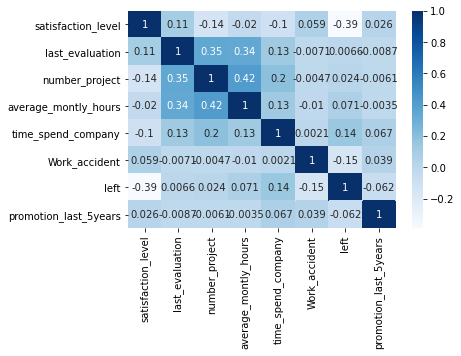

In [880]:
sns.heatmap(HR.corr(), cmap='Blues', annot=True)
plt.show()

In [881]:
corr_matrix = np.round(HR.corr(), 2)
corr_matrix
# correlation is linear for time_spend_company because it it the highest 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


---

We can see that time_spend_company has the highest correlation with the left, while satisfaction_level has the lowest correlation. We have a few non-numerical variables that we may also consider to predict left, i.e., salary and Department. 
      
---

In [882]:
pd.unique(HR['salary'])

array(['low', 'medium', 'high'], dtype=object)

In [883]:
HR['low_salary'] = np.where(HR['salary'] == 'low', '1', '0')
HR['medium_salary'] = np.where(HR['salary'] == 'medium', '1', '0')
HR['high_salary'] = np.where(HR['salary'] == 'high', '1', '0')


In [884]:
HR = HR.astype({"low_salary":"int","medium_salary":"int", "high_salary": "int"})

In [885]:
np.round(HR.corr(), 2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low_salary,medium_salary,high_salary
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03,-0.05,0.03,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01,0.01,0.01,-0.02
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01,-0.00,0.01,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00,-0.00,0.01,-0.01
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07,-0.04,0.02,0.04
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04,-0.01,0.00,0.01
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06,0.13,-0.07,-0.12
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00,-0.08,0.04,0.08
low_salary,-0.05,0.01,-0.00,-0.00,-0.04,-0.01,0.13,-0.08,1.00,-0.85,-0.29
medium_salary,0.03,0.01,0.01,0.01,0.02,0.00,-0.07,0.04,-0.85,1.00,-0.26


In [886]:
pd.unique(HR['Department'])

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [887]:
HR.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low_salary,medium_salary,high_salary
Department,,,,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.496333,0.436023,0.067645
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.462516,0.472681,0.064803
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.466754,0.436767,0.096480
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.453315,0.485792,0.060893
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.285714,0.357143,0.357143
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.468531,0.438228,0.093240
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.500000,0.424612,0.075388
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.507005,0.428019,0.064976
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.514132,0.422611,0.063257


---
We see that HR is the department that has the highest average of employees that left. Furthermore, an employee with a low salary is most likely to leave the company than an employee with a medium or high salary.

---

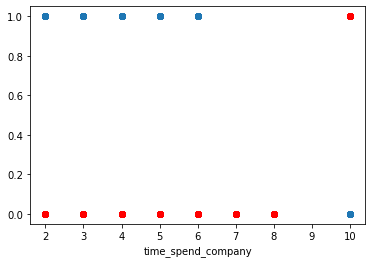

In [888]:
X = HR[['time_spend_company']]
y = HR['left']

log_reg = LogisticRegression()

log_reg.fit(X, y)
plt.scatter(X, y)

y_pred = log_reg.predict(X)

plt.scatter(X, y_pred, color = "red")

plt.xlabel('time_spend_company');  
#we can assume the lonely red represent an employee who actually did not leave

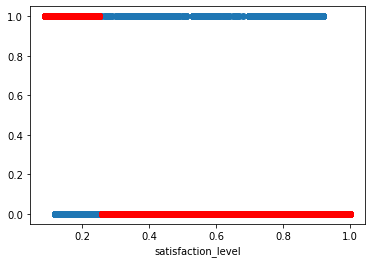

In [889]:
X = HR[['satisfaction_level']]
y = HR['left']

log_reg = LogisticRegression()

log_reg.fit(X, y)

plt.scatter(X, y)

y_pred = log_reg.predict(X)

plt.scatter(X, y_pred, color = "red")

plt.xlabel('satisfaction_level');  
# we can see that an employee is most likely to leave if they are not satisfied,
# while an employee that is satisfied is likely to not leave the company.

In [890]:
X = HR[['satisfaction_level', 'high_salary', 'low_salary', 'Work_accident']]
y = HR['left'] # y is our target variable 

In [891]:
log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

In [892]:
b = log_reg.intercept_
b

array([0.90840462])

In [893]:
w = log_reg.coef_
w

array([[-3.80805436, -1.31303479,  0.5093628 , -1.46486121]])

In [894]:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X)
confusion_matrix(y, y_pred)  

array([[10694,   734],
       [ 2497,  1074]])

In [895]:
HR['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [896]:
(10694+1074)/(10694+734+2497+1074)  #accuracy 

0.7845856390426028

In [897]:
log_reg.score(X, y) 

0.7845856390426028

In [898]:
print(classification_report(y, y_pred)) #classification report 


              precision    recall  f1-score   support

           0       0.81      0.94      0.87     11428
           1       0.59      0.30      0.40      3571

    accuracy                           0.78     14999
   macro avg       0.70      0.62      0.63     14999
weighted avg       0.76      0.78      0.76     14999



---

We have a total of 14999 employees in the dataset. By summing the rows, the first thing we realize is that 11428 employees did not leave and 3571 employees left the company. Of the employees that did not leave, our algorithm correctly predicted 10694 employees. Furthermore, the algorithm predicted that only 1074 of the 3571 employees will leave the company, meaning it got a whopping 2497 employees wrong. Overall, the model's accuracy of employees that left and employees that did not leave the company is 78%. We can say that the model is a good predictor for employees that will not leave; however, it still needs improvement for predicting employess that will leave. 

---